# Situación Problema

### **Pronosticar el '% de Desperdicio' que se genera en los procesos de producción de la empresa Polímeros PR S.A. de C.V a través del diseño de un modelo de Regresión Simple**

**_- Importar las librerías a utilizar_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 48.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import statsmodels.api as sm

In [6]:
%ls datasets/

 adult.csv                      data.csv
 airline_data.csv               headbrain.csv
 antropometria00.csv            movies.csv
 antropometria-dataset.csv      nhanes_2015_2016.csv
'Base de Datos SP code.ipynb'   pokemon.csv
'Base de Datos SP.xlsx'         sample_pivot.csv
 Canada.xlsx                   'Situación Problema code.ipynb'
 Cartwheeldata.csv              tips.csv
 census.csv                     weight-height.csv
 cwurData.csv


## 1. ¿Cuál es la variable de interés a pronosticar?, ¿Qué se espera lograr con este proyecto?

**_- Cargar la base de datos e identificar la variable de interés_**

In [7]:
df=pd.read_excel('datasets/Base de Datos SP.xlsx',
               sheet_name='Base de Datos SP',
               engine='openpyxl'
              )
df

,Día,Producto,Turno,Línea de \nproducción,Proceso,Kg de materia prima utilizada,Kg de producto terminado que se tira,% Desperdicio,Piezas por día,Unnamed: 9,Unnamed: 10
0,2020-10-10,A,Matutino,3,Extrusión,3604,865,0.240011,3500,NaN,NaN
1,2020-10-10,C,Vespertino,3,Moldeo,1180,401,0.339831,1200,NaN,NaN
2,2020-10-10,B,Vespertino,2,Inyección,4710,1884,0.400000,5000,NaN,NaN
3,2020-10-10,A,Matutino,3,Extrusión,3884,971,0.250000,3500,NaN,NaN
4,2020-10-10,C,Vespertino,3,Moldeo,1101,385,0.349682,1200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
155,2020-11-29,C,Vespertino,3,Moldeo,1121,392,0.349688,1200,NaN,NaN
156,2020-11-29,B,Vespertino,2,Inyección,4896,1860,0.379902,5000,NaN,NaN
157,2020-11-30,A,Matutino,3,Extrusión,3602,792,0.219878,3500,NaN,NaN
158,2020-11-30,C,Vespertino,3,Moldeo,1130,418,0.369912,1200,NaN,NaN


In [8]:
df.columns

Index(['Día', 'Producto', 'Turno', 'Línea de \nproducción', 'Proceso',
       'Kg de materia prima utilizada', 'Kg de producto terminado que se tira',
       '% Desperdicio', 'Piezas por día', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [9]:
ndf = df[['Día', 'Producto', 'Turno', 'Línea de \nproducción', 'Proceso',
       'Kg de materia prima utilizada', 'Kg de producto terminado que se tira',
       '% Desperdicio', 'Piezas por día']]
ndf

,Día,Producto,Turno,Línea de \nproducción,Proceso,Kg de materia prima utilizada,Kg de producto terminado que se tira,% Desperdicio,Piezas por día
0,2020-10-10,A,Matutino,3,Extrusión,3604,865,0.240011,3500
1,2020-10-10,C,Vespertino,3,Moldeo,1180,401,0.339831,1200
2,2020-10-10,B,Vespertino,2,Inyección,4710,1884,0.400000,5000
3,2020-10-10,A,Matutino,3,Extrusión,3884,971,0.250000,3500
4,2020-10-10,C,Vespertino,3,Moldeo,1101,385,0.349682,1200
...,...,...,...,...,...,...,...,...,...
155,2020-11-29,C,Vespertino,3,Moldeo,1121,392,0.349688,1200
156,2020-11-29,B,Vespertino,2,Inyección,4896,1860,0.379902,5000
157,2020-11-30,A,Matutino,3,Extrusión,3602,792,0.219878,3500
158,2020-11-30,C,Vespertino,3,Moldeo,1130,418,0.369912,1200


In [10]:
df = ndf
df

,Día,Producto,Turno,Línea de \nproducción,Proceso,Kg de materia prima utilizada,Kg de producto terminado que se tira,% Desperdicio,Piezas por día
0,2020-10-10,A,Matutino,3,Extrusión,3604,865,0.240011,3500
1,2020-10-10,C,Vespertino,3,Moldeo,1180,401,0.339831,1200
2,2020-10-10,B,Vespertino,2,Inyección,4710,1884,0.400000,5000
3,2020-10-10,A,Matutino,3,Extrusión,3884,971,0.250000,3500
4,2020-10-10,C,Vespertino,3,Moldeo,1101,385,0.349682,1200
...,...,...,...,...,...,...,...,...,...
155,2020-11-29,C,Vespertino,3,Moldeo,1121,392,0.349688,1200
156,2020-11-29,B,Vespertino,2,Inyección,4896,1860,0.379902,5000
157,2020-11-30,A,Matutino,3,Extrusión,3602,792,0.219878,3500
158,2020-11-30,C,Vespertino,3,Moldeo,1130,418,0.369912,1200


#### Conclusiones

La base de datos nos proporciona información de la empresa de Polímeros PR S.A. de C.V., la cual se dedica a producir diversos productos manufacturados principalmente de plástico.
En la base de datos se cuenta con 160 lecturas, en las que se toman en cuenta las variables en cuanto a el 'Día de la producción', 'El tipo de Producto', el 'Turno', la 'Línea de producción', el tipo de 'Proceso' que se llevó a cabo para fabricarlo, el 'Kg de la materia prima utilizadp', el 'Kg de producto terminado que se tira', el '% de Desperdicio' y las 'Piezas fabricadas por día'
de cada producto.

A partir de esto, la variable de interés a pronosticar es la de '% de Desperdicio' la cual describe el porcentaje de desperdicio que se genera en cada proceso en función de distintos factores como lo son: tipo de producto, Kg de materia prima utilizada, Kg de producto terminado que se tira, entre otras.

Con este proyecto se espera poder determinar el porcentaje de desperdicio generado al realizar un modelo de regresión simple para identificar las variables que nos ayudarán a realizar el pronóstico.

**_- Gráfico de Dispersión de 'Kg de materia prima utilizada' vs '% Desperdicio'_**

Text(0.5, 1.0, 'Scatter plot of Kg de materia prima utilizada vs % Desperdicio')

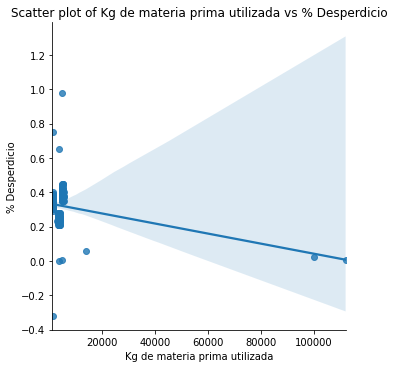

In [11]:
sns.lmplot(x='Kg de materia prima utilizada',
          y='% Desperdicio',
          data=df,
          fit_reg=True,
          )
plt.title('Scatter plot of Kg de materia prima utilizada vs % Desperdicio')

Text(0.5, 1.0, 'Scatter plot of Kg de producto terminado que se tira vs % Desperdicio')

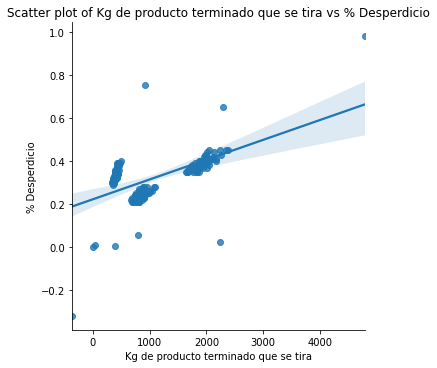

In [12]:
sns.lmplot(x='Kg de producto terminado que se tira',
          y='% Desperdicio',
          data=df,
          fit_reg=True,
          )
plt.title('Scatter plot of Kg de producto terminado que se tira vs % Desperdicio')

#### Conclusiones

Se realizó un gráfico de dispersión para conocer la intensidad de la relación entre dos variables numéricas y de qué manera afectan las variables independientes a la variable dependiente. El eje X representa la variable independiente, la cual en este caso sería la del 'Kg de materia prima utilizada' para la primera gráfica y 'Kg de producto terminado que se tira' para la segunda gráfica, mientras que el eje Y representa la variable dependiente, la cual en este caso sería la de '% de Desperdicio'.

Con este primer análisis se puede llegar a la conclusión de que la variable de 'Kg de producto terminado que se tira' es la que tiene un mayor nivel de relevancia sobre la variable de '% de Desperdicio%' pues es la que más le afecta, ya que se observa que es la que cuenta con un nivel de correlación positivo, sin embargo no es muy alto, por lo tanto se realizarán más pruebas para determinar qué tanto afecta a la variable de interés.

## 2. ¿Cuántas variables hay y de qué tipos son?, ¿Por qué es importante conocer esta información?

**_- Información del tipo de las variables_**

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Día                                   160 non-null    datetime64[ns]
 1   Producto                              160 non-null    object        
 2   Turno                                 160 non-null    object        
 3   Línea de 
producción                  160 non-null    int64         
 4   Proceso                               160 non-null    object        
 5   Kg de materia prima utilizada         160 non-null    int64         
 6   Kg de producto terminado que se tira  160 non-null    int64         
 7   % Desperdicio                         160 non-null    float64       
 8   Piezas por día                        160 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 11.4+ KB


#### Conclusiones

Lo primero a analizar son las dimensiones de la muestra: se cuenta con una cantidad de 9
variables y 160 observaciones. 

De igual manera se identificaron los siguientes tipos variable: datatime (1) que es la de 'Día', float (1) que es justamenta la variable de interés '% de Desperdicio', int (4) que serían las de 'Línea de producción', 'Kg de materia prima utilizada', 'Kg de producto terminado que se tira', y 'Piezas por día', object (3) que serían las de 'Producto', 'Turno' y 'Proceso'. 

Por lo tanto se puede inferir que hay 4 variables continuas predictoras ('Día', 'Kg de materia prima utilizada', 'Kg de producto terminado que se tira' y '% de Desperdicio'), y 5 variables categóricas predictoras ('Producto', 'Turno', 'Línea de producción', 'Proceso' y 'Piezas por día'). 

Es importante saber esto para que el modelo de regresión admita variables de estos tipo, de lo contrario, y que se pueda generar la gráfica esperada.

## 3 ¿Qué distribución sigue la variable de interés ('% Desperdicio')?

**_- Información de la distribución de las variables_**

In [14]:
df.describe()

,Línea de \nproducción,Kg de materia prima utilizada,Kg de producto terminado que se tira,% Desperdicio,Piezas por día
count,160.000000,160.00000,160.000000,160.000000,160.000000
mean,2.668750,4552.09375,1068.887500,0.320820,3220.625000
std,0.472141,11609.68623,735.706967,0.120930,1571.006843
min,2.000000,1100.00000,-369.000000,-0.320312,1200.000000
25%,2.000000,1233.75000,428.500000,0.250104,1200.000000
50%,3.000000,3578.50000,826.500000,0.339845,3500.000000
75%,3.000000,4711.25000,1818.500000,0.379918,5000.000000
max,3.000000,112100.00000,4800.000000,0.980392,5000.000000


#### Conclusiones

A continuación se determinó la cantidad, la media, la desviación estándar, el percentil, y el valor mínimo y máximo de cada variable.

La variable interés cuenta con 160 datos, una media de 0.320820, una desviación estándar de 0.120930, un valor mínimo de -0.320312, y un valor máximo de 0.980392, además de que ésta se encuentra en un rango entre (0,1), lo cual representa el porcentaje de aceptación del desperdicio (de 0% a 100%). Es en ese rango en el que se encontrará el pronóstico de regresión.

## 4. ¿Qué tipo de distribución sigue la variable de interés                                ('% Desperdicio')?

**_- Histograma de la variable de interés '% Desperdicio'_**

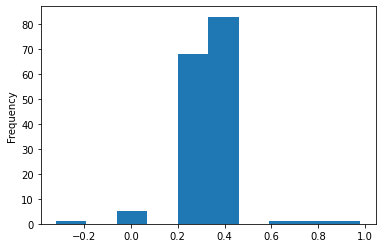

In [15]:
histogram = df['% Desperdicio'].plot(kind = 'hist')

#### Conclusiones

Se realizó un histograma de la variable de interés '% Desperdicio', dándonos como resultado el tipo de distribución de sus datos, del cual se puede observar que presenta valores atípicos. Esto se puede confirmar debido al patrón que se forma en la gráfica, que es de 2 largas barras en el centro muy alejadas de las demás, además de que no presenta la forma adecuada de tipo "campana" pero tampoco presenta asimetría.

## 5. ¿Cuál es la variable de mayor correlación con la variable de interés ('% Desperdicio')?

**_- Matriz de correlación de todas las variables para conocer aquella de mayor interés para el modelo_**

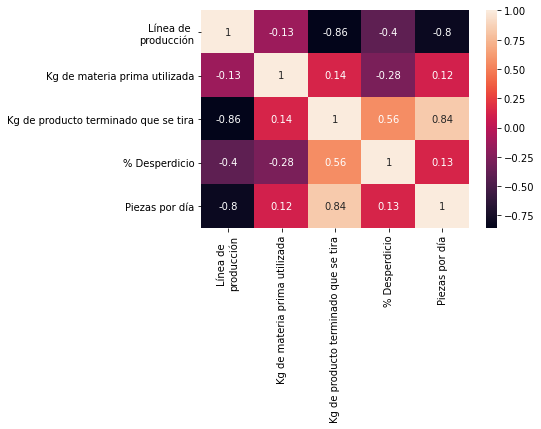

In [16]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [17]:
vars = ['Día', 'Producto', 'Turno', 'Línea de \nproducción', 'Proceso',
       'Kg de materia prima utilizada', 'Kg de producto terminado que se tira',
       '% Desperdicio', 'Piezas por día']
df = df[vars].dropna()
df

,Día,Producto,Turno,Línea de \nproducción,Proceso,Kg de materia prima utilizada,Kg de producto terminado que se tira,% Desperdicio,Piezas por día
0,2020-10-10,A,Matutino,3,Extrusión,3604,865,0.240011,3500
1,2020-10-10,C,Vespertino,3,Moldeo,1180,401,0.339831,1200
2,2020-10-10,B,Vespertino,2,Inyección,4710,1884,0.400000,5000
3,2020-10-10,A,Matutino,3,Extrusión,3884,971,0.250000,3500
4,2020-10-10,C,Vespertino,3,Moldeo,1101,385,0.349682,1200
...,...,...,...,...,...,...,...,...,...
155,2020-11-29,C,Vespertino,3,Moldeo,1121,392,0.349688,1200
156,2020-11-29,B,Vespertino,2,Inyección,4896,1860,0.379902,5000
157,2020-11-30,A,Matutino,3,Extrusión,3602,792,0.219878,3500
158,2020-11-30,C,Vespertino,3,Moldeo,1130,418,0.369912,1200


In [18]:
df[vars].corr()

,Línea de \nproducción,Kg de materia prima utilizada,Kg de producto terminado que se tira,% Desperdicio,Piezas por día
Línea de \nproducción,1.000000,-0.131953,-0.855027,-0.400609,-0.799644
Kg de materia prima utilizada,-0.131953,1.000000,0.136484,-0.280620,0.115459
Kg de producto terminado que se tira,-0.855027,0.136484,1.000000,0.560424,0.835065
% Desperdicio,-0.400609,-0.280620,0.560424,1.000000,0.132872
Piezas por día,-0.799644,0.115459,0.835065,0.132872,1.000000


#### Conclusiones

Se realizaron las siguientes matrices de correlación para determinar la(s) variable(s) de mayor interés para el pronóstico del modelo. Al observar la matriz, se identificó que la variable de 'Kg de producto terminado que se tira' es la que tiene la relación más alta con la variable de interés '% Desperdicio', debido a que presenta uno de los valores más altos, cercanos a 1.0, que es de 0.56. Como dato extra se identificó que esta misma variable también es significativa para determinar las 'Piezas por día' acorde a su valoración de 0.84.

La segunda variable de mayor interés para el modelo sería justamente la de 'Piezas por día' la cual describe las piezas fabricadas de cada producto por día. Esto se determinó debido a que es la que tiene el segundo valor más alto en relación con la variable de interés, que es de 0.13.


## 6. ¿Cómo es la correlación existente entre la variable independiente 'Kg de producto terminado que se tira' y la variable dependiente '% Desperdicio'?

**_- Diagramas para determinar la correlación entre la variable independiente más relevante para la variable dependiente o 'variable de interés'_**

Text(0.5, 1.0, 'Scatter plot of Kg de producto terminado que se tira vs % Desperdicio')

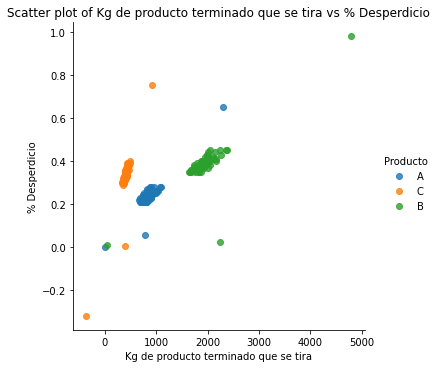

In [19]:
sns.lmplot(x='Kg de producto terminado que se tira',
           y='% Desperdicio',
           data=df,
           fit_reg=False,
           hue= 'Producto'
          )
plt.title('Scatter plot of Kg de producto terminado que se tira vs % Desperdicio')

Text(0.5, 1.0, 'Swarmplot of Kg de producto terminado que se tira vs % Desperdicio')

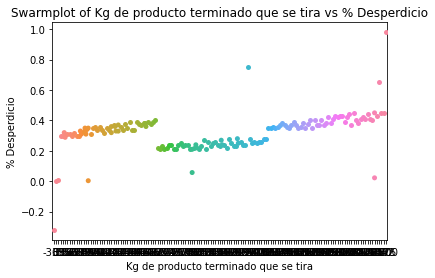

In [20]:
sns.swarmplot(x='Kg de producto terminado que se tira',
              y='% Desperdicio',
              data=df,
             )
plt.title('Swarmplot of Kg de producto terminado que se tira vs % Desperdicio')


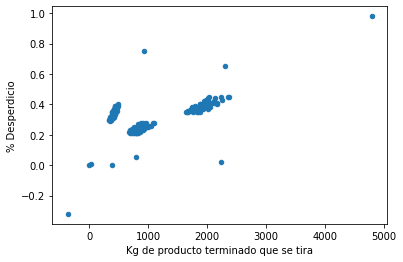

In [21]:
df.plot.scatter(x='Kg de producto terminado que se tira',
                 y='% Desperdicio');

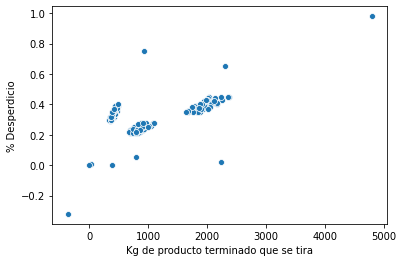

In [22]:
sns.scatterplot(x='Kg de producto terminado que se tira',
                y='% Desperdicio',
                data=df)

#### Conclusiones

Se realizaron varias Scatter Plots, el primero también tomando en cuenta el tipo de Producto A, B o C, para dividir por categorías el porcentaje de desperdicio de acuerdo al Kg de producto terminado que se tira. De igual manera se sacó un Swarmplot para confirmar dentro de otras visualizaciones su correlación. La cual basicamente nos indica que tiene una correlación positiva, puesto que a medida que aumenta el criterio 'Kg de producto terminado que se tira', aumenta el porcentaje de Desperdicio, ¿Esto qué signifca? Que entre más cantidad de kg de producto terminado que se tira por problemas de calidad, habrá un mayor porcentaje de desperdicio generado en cada proceso para los productos.

## 7.  ¿Existen valores atípicos en la variable independiente 'Kg de producto terminado que se tira'?

**_- Box plot para identificar si existen valores atípicos_**

Text(0.5, 1.0, 'Datos atípicos en Kg de producto terminado que se tira')

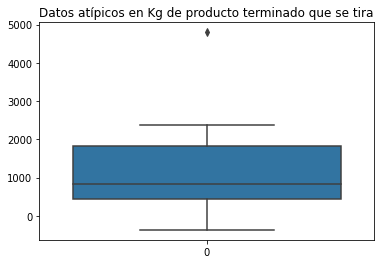

In [23]:
sns.boxplot(data=df['Kg de producto terminado que se tira'])
plt.title('Datos atípicos en Kg de producto terminado que se tira')

Text(0.5, 1.0, 'Producto A Boxplot')

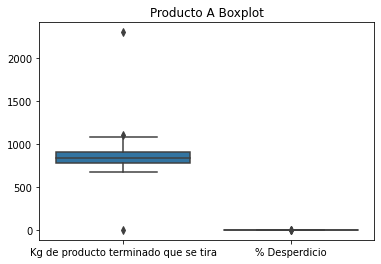

In [24]:
sns.boxplot(data=df.loc[df['Producto']=='A',
                        ['Kg de producto terminado que se tira','% Desperdicio']])
plt.title('Producto A Boxplot')

Text(0.5, 1.0, 'Producto A Boxplot')

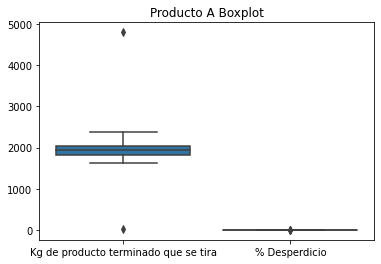

In [25]:
sns.boxplot(data=df.loc[df['Producto']=='B',
                        ['Kg de producto terminado que se tira','% Desperdicio']])
plt.title('Producto A Boxplot')

Text(0.5, 1.0, 'Producto A Boxplot')

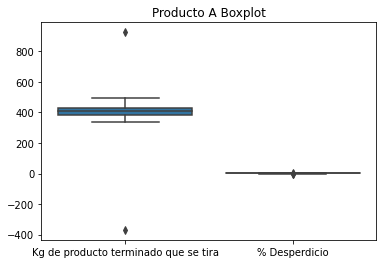

In [26]:
sns.boxplot(data=df.loc[df['Producto']=='C',
                        ['Kg de producto terminado que se tira','% Desperdicio']])
plt.title('Producto A Boxplot')

#### Conclusiones

A partir de realizar los Box Plot de la variable independiente 'Kg de producto terminado que se tira' se observa la presencia de un sólo dato atípico, sin embargo, el índice de correlación sigue siendo bueno, tal vez no muy alto, pero es el más alto de todas las variables del estudio, y además está por encima de la mitad (0.56), por lo que se procede a realizar el análisis de regresión. 

Cabe recarlcar que es importante saber esto para mantener la confiabilidad del pronóstico.

## 8. ¿Qué tan bueno es el análisis de regresión para '% Desperdicio' en función de 'Kg de producto terminado que se tira'?, ¿Qué indica la R-cuadrada, los P-value de los parámetros B0 y B1 y el Durbin-Watson?

**_- Análisis de regresión_**

In [34]:
model = sm.OLS.from_formula ('% Desperdicio ~ Kg de producto terminado que se tira',
                            data = df)
result = model.fit()
result.summary()

AssertionError: 

#### Conclusiones


## 9. ¿Cómo se vería nuevamente la gráfica de dispersión de las observaciones con la gráfica de regresión propuesta por el modelo?, ¿Qué se puede concluir apartir de ello?

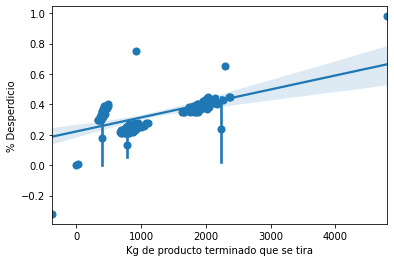

In [29]:
ax = sns.regplot (x='Kg de producto terminado que se tira',
                  y='% Desperdicio',
                  data = df,
                 x_estimator = np.mean,
                 )

#### Conclusiones

Finalmente se grafica de nuevo la Scatter Plot con el pronóstico de regresión y se observa
que se ajusta ciertamente bien para conocer el Porcentaje de Desperdicio de los procesos de producción de la empresa Polímeros PR S.A. de C.V. en función de los Kg de sus productos terminados que se tiran, lo cual era la meta del proyecto.

Con este nuevo Modelo de Pronóstico, se pueden ingresar las métricas de los kg de cualquier producto terminado que se tiran para conocer el porcentaje de su desperdicio, lo cual es muy útil dentro del área de Control, Calidad y Productividad.